In [21]:
import pandas as pd
# Biblioteca que gera reports automaticos
import pandas_profiling as pp
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
# Ajuda a otimizar o uso da memória
gc.enable()

In [2]:
ibov = pd.read_csv('^BVSP.csv')
print(ibov.dtypes)
ibov.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,37550.0,40265.0,37550.0,40244.0,40244.0,1055200.0
1,2009-01-05,40243.0,41889.0,39526.0,41519.0,41519.0,1909200.0
2,2009-01-06,41520.0,42363.0,41520.0,42312.0,42312.0,1791000.0
3,2009-01-07,42308.0,42308.0,40563.0,40820.0,40820.0,1383600.0
4,2009-01-08,40819.0,41991.0,40251.0,41991.0,41991.0,1556000.0


In [3]:
dowj = pd.read_csv('^DJI.csv')
print(dowj.dtypes)
dowj.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [4]:
exrate = pd.read_csv('USD_BRL Historical Data.csv')
print(exrate.dtypes)
exrate.head()

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object


,Date,Price,Open,High,Low,Change %
0,"Apr 19, 2019",3.9275,3.9275,3.9275,3.9275,0.00%
1,"Apr 18, 2019",3.9274,3.9409,3.9522,3.9047,-0.27%
2,"Apr 17, 2019",3.9382,3.9052,3.9477,3.8859,0.88%
3,"Apr 16, 2019",3.9040,3.8730,3.9085,3.8687,0.82%
4,"Apr 15, 2019",3.8723,3.8811,3.8908,3.8588,-0.25%


In [5]:
icb = pd.read_excel('Gráfico Historico_ICB.xlsx')
print(icb.dtypes)
icb.head()

Data    datetime64[ns]
ICB            float64
dtype: object


,Data,ICB
0,2004-01-02,10000.000000
1,2004-01-05,10226.384883
2,2004-01-06,10384.872410
3,2004-01-07,10288.020286
4,2004-01-08,10213.599971


### Cleaning

In [6]:
icb.columns = ['Date', 'ICB']
series=[ibov,dowj,exrate,icb]
for serie in series:
    serie['Date'] = pd.to_datetime(serie['Date'])
    serie.set_index('Date', inplace=True)

In [7]:
df = ibov.loc[:,['Close']].join(
    dowj.loc[:,['Close']], lsuffix='IBOV', rsuffix='DJI').join(
    exrate.loc[:,['Price']],rsuffix='USDxBRL').join(
    icb).dropna()

In [8]:
df.head()

,CloseIBOV,CloseDJI,Price,ICB
Date,,,,
2009-01-02,40244.0,9034.690430,2.3220,14233.230261
2009-01-05,41519.0,8952.889648,2.2365,13896.524465
2009-01-06,42312.0,9015.099609,2.1695,13822.557683
2009-01-07,40820.0,8769.700195,2.2725,13803.581151
2009-01-08,41991.0,8742.459961,2.2955,13877.549904


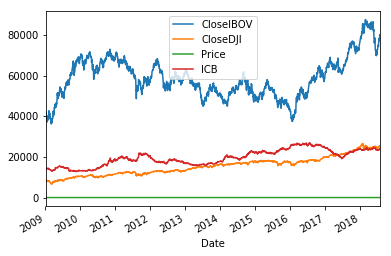

In [9]:
df.plot()

Car Wash Operations days

In [10]:
big = ['2014-03-17','2014-04-11','2014-11-14','2015-04-15','2015-06-19','2015-07-28','2015-08-03','2016-02-22',
       '2016-03-04','2016-09-22','2016-09-26','2016-11-17','2017-07-27','2017-08-18','2018-11-23',
       '2014-07-01','2015-01-14','2015-02-05','2015-03-16','2015-03-27','2015-04-10','2018-03-09',#duvida de qual pertence
       '2015-07-02','2015-11-24','2016-03-22','2016-04-12','2016-05-23','2016-05-24','2016-07-04', #duvida de qual pertence
       '2018-05-08','2018-09-26'] #duvida de qual pertence
med = ['2014-03-20','2014-06-11','2014-08-22','2015-05-21','2015-08-13','2015-09-21','2015-11-16','2016-01-27',
       '2016-03-21','2016-04-01','2016-07-07','2016-08-02','2016-11-10','2017-02-23','2017-03-28','2017-05-04',
       '2017-05-26','2017-08-23','2017-10-20','2017-11-21','2018-02-22','2018-03-23','2018-06-21','2018-09-11',
       '2018-09-25','2018-11-05']

In [11]:
dates=[]
for conj in (big,med):
    for date in conj:
        dates.append(date)

In [12]:
df['CarWash']= 0
df.loc[df.index.isin(pd.to_datetime(dates)),'CarWash'] = 1 

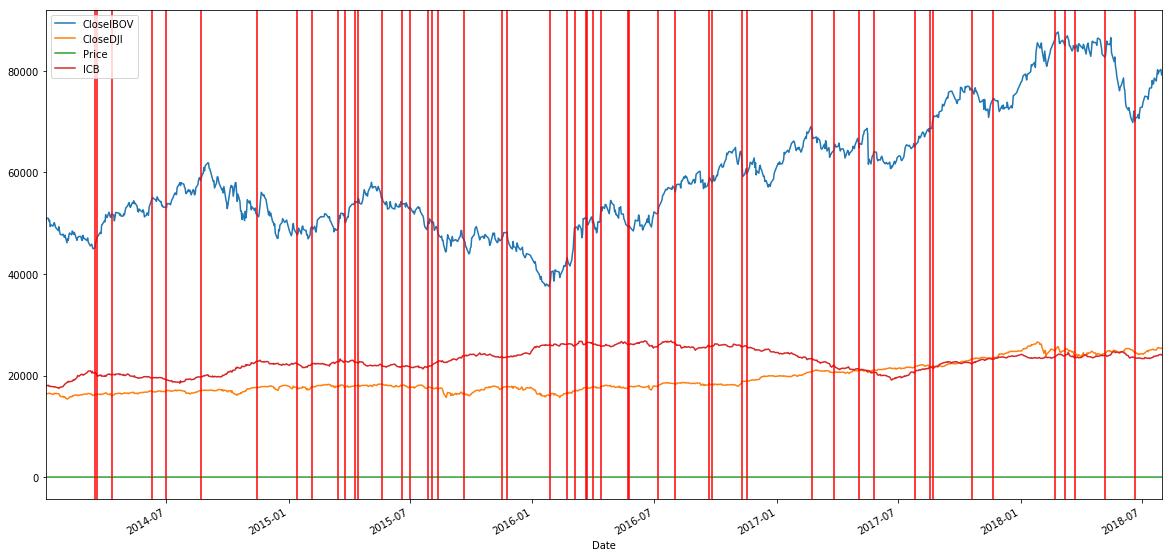

In [17]:
df.loc[df.index > '2014-01-01',:'ICB'].plot(figsize = (20,10))
xcoords = df.loc[df.CarWash == 1,:].index
for xc in xcoords:
    plt.axvline(x=xc,color='red')

### Data Manipulation

In [64]:
def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

In [46]:
df_diff=pd.DataFrame(index=df.index)
for column in df.loc[:,:'ICB'].columns:
    df_diff[column]=np.log(df[column]).diff(1)

In [47]:
df_diff.dropna(inplace=True)

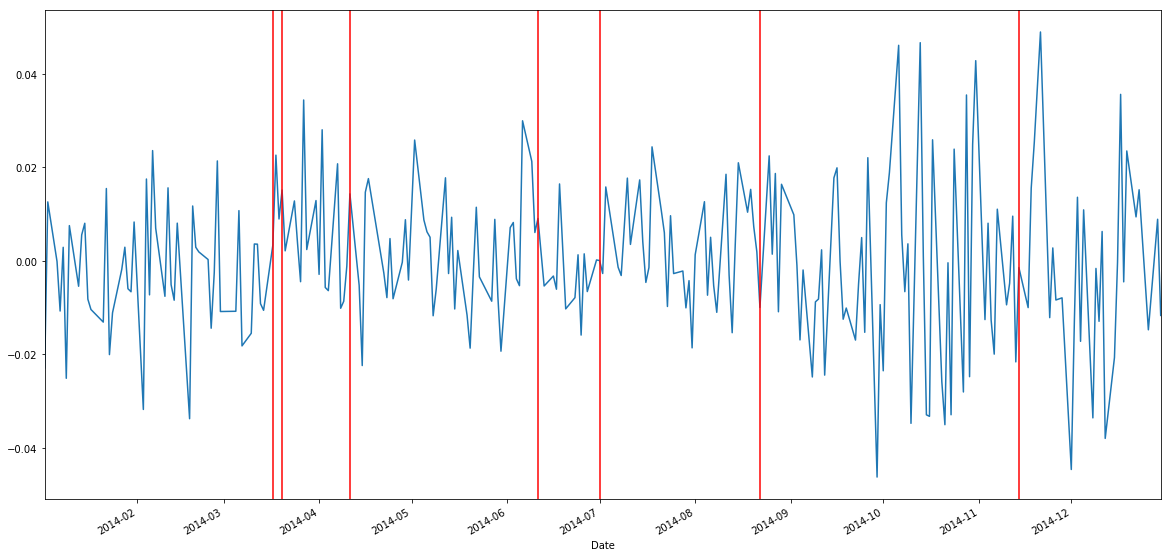

In [48]:
df_diff.loc['2014-01-01':'2015-01-01','CloseIBOV'].plot(figsize = (20,10))
for xc in xcoords:
    plt.axvline(x=xc,color='red')

In [52]:
df_diff['CarWash']= 0
df_diff.loc[df_diff.index.isin(pd.to_datetime(dates)),'CarWash'] = 1 

In [ ]:
endog = df_diff.loc['2014-01-01':, :]
exog = endog['CarWash']

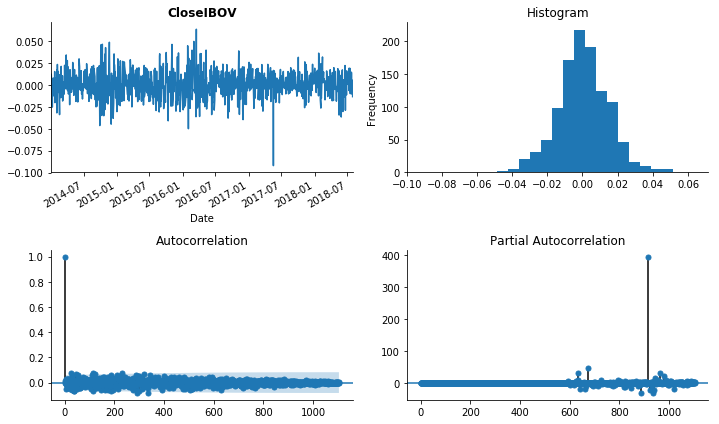

(<matplotlib.axes._subplots.AxesSubplot at 0x1a239f0400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a239ad7b8>)

In [66]:
tsplot(endog['CloseIBOV'], 'CloseIBOV')

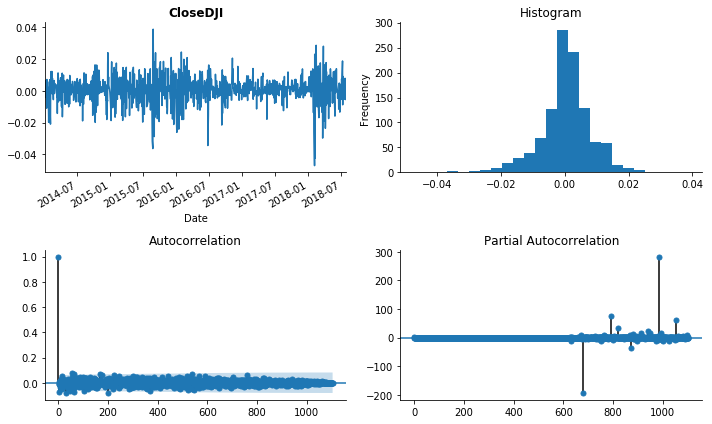

(<matplotlib.axes._subplots.AxesSubplot at 0x1a238c3240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23f67be0>)

In [68]:
tsplot(endog['CloseDJI'], 'CloseDJI')

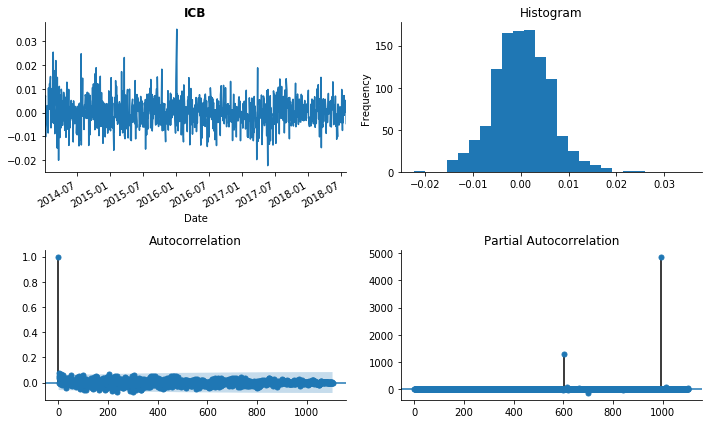

(<matplotlib.axes._subplots.AxesSubplot at 0x1a246dd6d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23c33a90>)

In [69]:
tsplot(endog['ICB'], 'ICB')

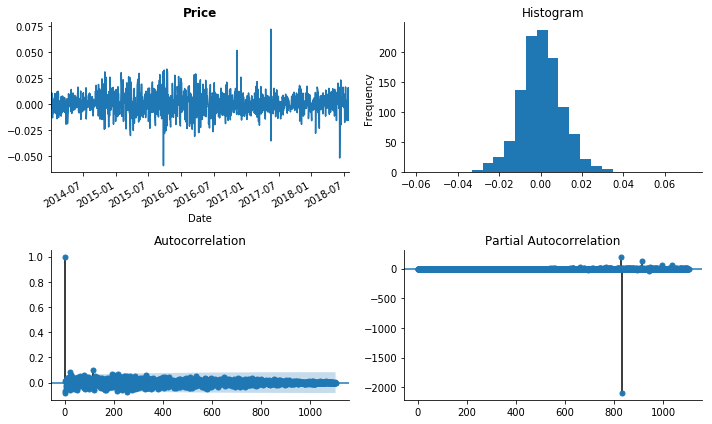

(<matplotlib.axes._subplots.AxesSubplot at 0x1c26193438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c261c3748>)

In [70]:
tsplot(endog['Price'], 'Price')

In [67]:
mod = sm.tsa.VARMAX(endog[['CloseIBOV', 'CloseDJI', 'ICB', 'Price']], order=(6,0), trend='nc', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                       Statespace Model Results                                      
Dep. Variable:     ['CloseIBOV', 'CloseDJI', 'ICB', 'Price']   No. Observations:                 1105
Model:                                               VARX(6)   Log Likelihood               14660.067
Date:                                       Wed, 24 Apr 2019   AIC                         -29100.134
Time:                                               00:28:13   BIC                         -28549.298
Sample:                                                    0   HQIC                        -28891.795
                                                      - 1105                                         
Covariance Type:                                         opg                                         
Ljung-Box (Q):          45.44, 25.47, 26.67, 38.39   Jarque-Bera (JB):   166.99, 451.83, 90.72, 481.82
Prob(Q):                    0.26, 0.96, 0.95, 0.54   Prob(JB):                  0

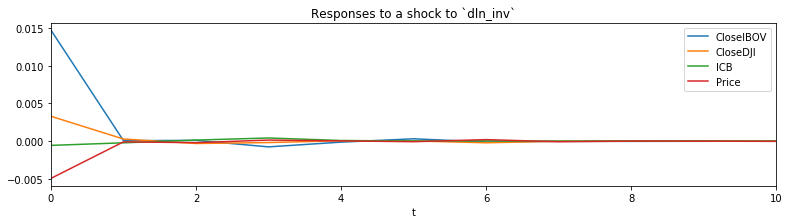

In [71]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');